In [1]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [2]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [3]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acc_Score =acf[['ID','Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score
0,91,3,3,2,3,3,2.8
1,276,3,3,3,3,3,3.0
2,158,3,3,3,3,3,3.0
3,14,3,3,2,3,3,2.8
4,288,3,3,3,3,3,3.0


In [4]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
acd_score =af[['ID','Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score
0,323,1,1,1,1,1,1.0
1,306,1,1,1,1,1,1.0
2,322,1,1,1,1,1,1.0
3,316,1,1,1,1,1,1.0
4,195,1,1,1,1,1,1.0


In [5]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,168,1,0,1,1,1
2,103,0,0,1,1,2
3,174,0,0,1,1,2
4,8,0,0,2,1,1
...,...,...,...,...,...,...
348,273,0,6,2,1,1
349,199,0,6,2,1,2
350,2,2,6,2,1,1
351,11,2,6,3,1,1


In [6]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']

df1.head()

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,119,0,0,0,0,1,4.6,3.0
1,168,1,0,1,1,1,3.4,2.5
2,103,0,0,1,1,2,3.4,3.5
3,174,0,0,1,1,2,3.4,3.5
4,8,0,0,2,1,1,4.0,2.75


In [7]:
bins = [0, 2.33, 3.64, 5]
labels = [1, 2, 3]
df1['Acd_score_group'] = pd.cut(df1['Acd_score'], bins=bins, labels=labels)

In [8]:
df1['Acd_score_group'] = df1['Acd_score_group'].astype(int)
df1['Acd_score_group'].unique()

array([2, 3, 1])

In [9]:
print(df1['Acd_score_group'].unique())
print(df1['Acd_score_group'].value_counts())

[2 3 1]
2    179
1     97
3     77
Name: Acd_score_group, dtype: int64


In [10]:
df1=df1.astype('float')
X=df1.drop(['ID','Acd_score','Acd_score_group','Enc_Gender'],axis=1)
y=df1['Acd_score_group']

In [11]:
from keras.utils import to_categorical
y1=to_categorical(y)

In [12]:
np.unique(y)

array([1., 2., 3.])

In [13]:
y1=y1[:, 1:]

## FeedForward Neural Network -Classifier

In [ ]:
#class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
#class_weights_dict =dict(enumerate(class_weights))#

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD ,Nadam,RMSprop,Adagrad
from sklearn.utils.class_weight import compute_class_weight


X_train,X_test,y_train,y_test= train_test_split(X,y1,test_size=0.25,random_state=40)
#class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict ={0: 1.1630584192439862, 1: 0.5873556797020484, 2: 1.6281385281385282}
#dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

#h=model.fit(X_train, y_train, epochs=250, batch_size=64,verbose=1)
h=model.fit(X_train, y_train, epochs=250, batch_size=64,verbose=1,class_weight=class_weights_dict)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
model.evaluate(X_test,y_test)

Epoch 1/250
5/5 [==============================] - 1s 8ms/step - loss: 1.0904 - accuracy: 0.3750
Epoch 2/250
5/5 [==============================] - 0s 9ms/step - loss: 1.0994 - accuracy: 0.3068
Epoch 3/250
5/5 [==============================] - 0s 9ms/step - loss: 1.0868 - accuracy: 0.2765
Epoch 4/250
5/5 [==============================] - 0s 8ms/step - loss: 1.0897 - accuracy: 0.2424
Epoch 5/250
5/5 [==============================] - 0s 8ms/step - loss: 1.0922 - accuracy: 0.2992
Epoch 6/250
5/5 [==============================] - 0s 9ms/step - loss: 1.0779 - accuracy: 0.2992
Epoch 7/250
5/5 [==============================] - 0s 9ms/step - loss: 1.0881 - accuracy: 0.2689
Epoch 8/250
5/5 [==============================] - 0s 12ms/step - loss: 1.1056 - accuracy: 0.2500
Epoch 9/250
5/5 [==============================] - 0s 12ms/step - loss: 1.0616 - accuracy: 0.2765
Epoch 10/250
5/5 [==============================] - 0s 8ms/step - loss: 1.0505 - accuracy: 0.3409
Epoch 11/250
5/5 [=========

[1.0942378044128418, 0.47191011905670166]

In [19]:
import numpy as np

# Assume y_test_classes contains the true class labels
unique_classes, class_counts = np.unique(y_pred_classes, return_counts=True)

# Print the count of each class
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")


Class 0: 16 samples
Class 1: 55 samples
Class 2: 18 samples


In [20]:
import numpy as np

# Assume y_test_classes contains the true class labels
unique_classes, class_counts = np.unique(y_test_classes, return_counts=True)

# Print the count of each class
for cls, count in zip(unique_classes, class_counts):
    print(f"Class {cls}: {count} samples")

Class 0: 21 samples
Class 1: 45 samples
Class 2: 23 samples


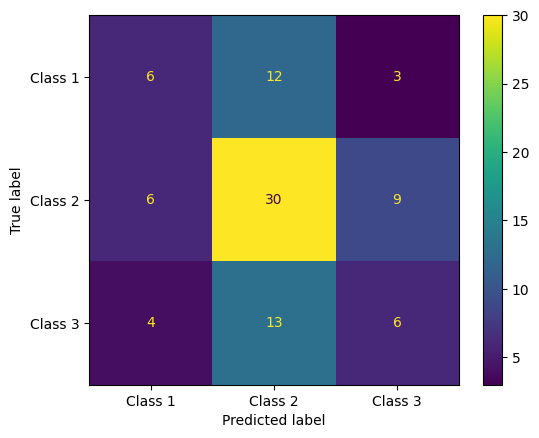

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 1','Class 2','Class 3'])
disp.plot()
plt.show()

In [22]:
cm_df = pd.DataFrame(cm, index=['Class_1', 'Class_2', 'Class_3'], columns=['Class_1', 'Class_2', 'Class_3'])
cm_df

,Class_1,Class_2,Class_3
Class_1,6,12,3
Class_2,6,30,9
Class_3,4,13,6


In [24]:
from google.cloud import bigquery
client = bigquery.Client(project='surveyproject-378222')
sc = """
DROP TABLE IF EXISTS `surveyproject-378222.Capstone_Project.Confusion_matrix`;
"""
query_job = client.query(sc)
query_job.result()
table_id = 'surveyproject-378222.Capstone_Project.Confusion_matrix'
schema = [
    bigquery.SchemaField('Class_1', 'INTEGER',mode='REQUIRED'),
    bigquery.SchemaField('Class_2', 'INTEGER',mode='REQUIRED'),
    bigquery.SchemaField('Class_3', 'INTEGER',mode='REQUIRED'),
    ]
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)
print(f'Table {table.table_id} created in BigQuery.')
project_id = 'surveyproject-378222'
client = bigquery.Client(project=project_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
job = client.load_table_from_dataframe(cm_df, table_id, job_config=job_config)
job.result()

Table Confusion_matrix created in BigQuery.


LoadJob<project=surveyproject-378222, location=northamerica-northeast2, id=113ed2a5-df30-4c5f-a774-8911eb04e35d>

In [25]:
from sklearn.metrics import accuracy_score, precision_score
accuracy = round(accuracy_score(y_test_classes, y_pred_classes),2)*100
precision =round(precision_score(y_test_classes, y_pred_classes, average='weighted'),2)*100
print('Accuracy:', accuracy)
print('Precision:', precision)


Accuracy: 47.0
Precision: 45.0


In [26]:
overall_metrics = {'Accuracy': accuracy, 'Precision': precision}
om = pd.DataFrame(overall_metrics, index=[0])
om

,Accuracy,Precision
0,47.0,45.0


In [27]:
from google.cloud import bigquery
client = bigquery.Client(project='surveyproject-378222')
sc = """
DROP TABLE IF EXISTS `surveyproject-378222.Capstone_Project.Overall_metrics`;
"""
query_job = client.query(sc)
query_job.result()
table_id = 'surveyproject-378222.Capstone_Project.Overall_metrics'
schema = [
    bigquery.SchemaField('Accuracy', 'FLOAT',mode='REQUIRED'),
    bigquery.SchemaField('Precision', 'FLOAT',mode='REQUIRED'),
    ]
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)
print(f'Table {table.table_id} created in BigQuery.')
project_id = 'surveyproject-378222'
client = bigquery.Client(project=project_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
job = client.load_table_from_dataframe(om, table_id, job_config=job_config)
job.result()

Table Overall_metrics created in BigQuery.


LoadJob<project=surveyproject-378222, location=northamerica-northeast2, id=b025aced-b333-466f-a7e4-a366bc110a6d>

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3'])
print(report)

              precision    recall  f1-score   support

     Class 1       0.38      0.29      0.32        21
     Class 2       0.55      0.67      0.60        45
     Class 3       0.33      0.26      0.29        23

    accuracy                           0.47        89
   macro avg       0.42      0.40      0.41        89
weighted avg       0.45      0.47      0.46        89



In [29]:
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1_score = 2 * precision * recall / (precision + recall)
precision = np.round(precision, 3) * 100
recall = np.round(recall, 3) * 100
f1_score = np.round(f1_score, 3) * 100
metrics_dict = {'Class_Precision': precision,'Class_Recall': recall,'Class_F1-Score': f1_score}
metrics_df = pd.DataFrame(metrics_dict, index=['Class 1', 'Class 2', 'Class 3'])
metrics_df

,Class_Precision,Class_Recall,Class_F1-Score
Class 1,37.5,28.6,32.4
Class 2,54.5,66.7,60.0
Class 3,33.3,26.1,29.3


In [30]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Class 1 to Class 3
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class_Precision  3 non-null      float64
 1   Class_Recall     3 non-null      float64
 2   Class_F1-Score   3 non-null      float64
dtypes: float64(3)
memory usage: 96.0+ bytes


In [31]:
from google.cloud import bigquery
client = bigquery.Client(project='surveyproject-378222')
sc = """
DROP TABLE IF EXISTS `surveyproject-378222.Capstone_Project.Class_metrics`;
"""
query_job = client.query(sc)
query_job.result()
table_id = 'surveyproject-378222.Capstone_Project.Class_metrics'
schema = [
    bigquery.SchemaField('Class_Precision', 'FLOAT',mode='REQUIRED'),
    bigquery.SchemaField('Class_Recall', 'FLOAT',mode='REQUIRED'),
    bigquery.SchemaField('Class_F1-Score', 'FLOAT',mode='REQUIRED'),
    ]
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)
print(f'Table {table.table_id} created in BigQuery.')
project_id = 'surveyproject-378222'
client = bigquery.Client(project=project_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
job = client.load_table_from_dataframe(metrics_df, table_id, job_config=job_config)
job.result()

Table Class_metrics created in BigQuery.


LoadJob<project=surveyproject-378222, location=northamerica-northeast2, id=ca3a12b0-4cbe-4224-8f2c-7dade6cd72eb>

In [32]:
t1= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Confusion_matrix`',project_id='surveyproject-378222', dialect='standard') 
t2=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Overall_metrics`',project_id='surveyproject-378222', dialect='standard')
t3=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Class_metrics`',project_id='surveyproject-378222', dialect='standard')

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [33]:
t1

,Class_1,Class_2,Class_3
0,6,12,3
1,6,30,9
2,4,13,6


In [34]:
t2

,Accuracy,Precision
0,47.0,45.0


In [35]:
t3

,Class_Precision,Class_Recall,Class_F1-Score
0,37.5,28.6,32.4
1,54.5,66.7,60.0
2,33.3,26.1,29.3


In [36]:
import joblib
from google.colab import files
#joblib.dump(model, 'student_network.joblib')
#files.download('student_network.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>